In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('puzzle.csv', header=None)
df.columns = ['first','second']
print(df.head(10))

#data looks like it uploaded correctly
#unsure if I see anything interesting yet

      first    second
0  0.397150  2.113629
1  0.397150  2.113629
2  0.397150  2.113629
3  0.397150  2.113629
4  0.397150  2.113629
5  0.397150  2.113629
6  0.397150  2.113629
7  0.397150  2.113629
8  0.967562 -0.099246
9  0.061841 -1.333110


In [3]:
print(df.describe())

#still not much idea of what's going on with the values -- nothing stands out
#will try to visualize

             first       second
count  1024.000000  1024.000000
mean      0.504729    -0.388165
std       0.355107     1.499346
min      -0.925070    -2.837888
25%       0.389721    -1.559228
50%       0.591392    -1.129903
75%       0.746583     0.578621
max       1.195399     3.096964


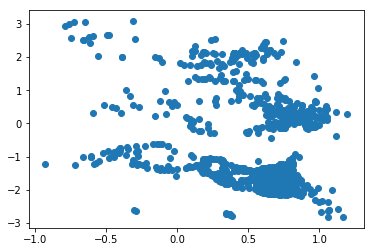

In [4]:
import matplotlib.pyplot as plt

X = df['first']
Y = df['second']

plt.scatter(X, Y)
plt.show()

#is this perhaps hopper's logo??
#feels like a stretch
#maybe if hopper was a reindeer? 

In [5]:
#any other relationships to think about?

print(df.corr())

#doesn't seem like it

           first    second
first   1.000000 -0.247705
second -0.247705  1.000000


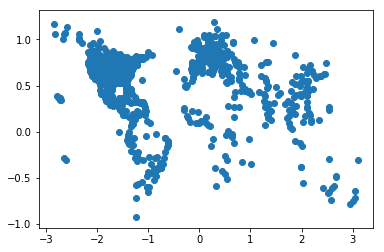

In [6]:
#other graphs? invert?

x = df['second']
y = df['first']

#plt.clf
plt.scatter(x, y)
plt.show()

#ok! looks like the world??

In [7]:
#what are the data points then
#coordinates?

print(df.head(5))

#data points scattered like this logically seem like coordinates, but the numbers don't appear to be coordinates
#convert from radians, maybe?

     first    second
0  0.39715  2.113629
1  0.39715  2.113629
2  0.39715  2.113629
3  0.39715  2.113629
4  0.39715  2.113629


In [8]:
#radians to degrees >> 180/pi
import math

#columns above were backwards so flip
df['x_deg'] = df['second'] * (180 / math.pi)
df['y_deg'] = df['first'] * (180 / math.pi)

print(df.head(20))

#these looks like coordinates!!

       first    second       x_deg      y_deg
0   0.397150  2.113629  121.101998  22.755002
1   0.397150  2.113629  121.101998  22.755002
2   0.397150  2.113629  121.101998  22.755002
3   0.397150  2.113629  121.101998  22.755002
4   0.397150  2.113629  121.101998  22.755002
5   0.397150  2.113629  121.101998  22.755002
6   0.397150  2.113629  121.101998  22.755002
7   0.397150  2.113629  121.101998  22.755002
8   0.967562 -0.099246   -5.686388  55.437196
9   0.061841 -1.333110  -76.381600   3.543223
10  0.719915 -0.151519   -8.681388  41.248103
11  0.759443  0.761602   43.636603  43.512902
12  0.930847 -0.049737   -2.849720  53.333599
13  0.505194 -0.237455  -13.605198  28.945501
14  0.745198  0.408607   23.411434  42.696695
15 -0.388084  1.991229  114.088995 -22.235598
16  0.132041 -1.257250  -72.035102   7.565381
17  0.715182  0.502910   28.814598  40.976899
18  1.067695 -2.617924 -149.996002  61.174400
19  0.897974  0.093803    5.374527  51.450097


In [9]:
#What are these coordiantes to!!
#searched on google ... nothing
#oops
#google search of 121.101998, 22.755002 yielded a result
#switch them back!

del df['x_deg']
del df['y_deg']

df['latitude'] = df['first'] * (180 / math.pi)
df['longitude'] = df['second'] * (180 / math.pi)

print(df.head(10))

#searched first entry and took us to Taitung Airport in Taiwan!
#searched row 8 and took us to Campbeltown Airport in the UK
#are these all airports?

      first    second   latitude   longitude
0  0.397150  2.113629  22.755002  121.101998
1  0.397150  2.113629  22.755002  121.101998
2  0.397150  2.113629  22.755002  121.101998
3  0.397150  2.113629  22.755002  121.101998
4  0.397150  2.113629  22.755002  121.101998
5  0.397150  2.113629  22.755002  121.101998
6  0.397150  2.113629  22.755002  121.101998
7  0.397150  2.113629  22.755002  121.101998
8  0.967562 -0.099246  55.437196   -5.686388
9  0.061841 -1.333110   3.543223  -76.381600


In [10]:
#found database of airport coordinates here: https://www.partow.net/miscellaneous/airportdatabase/

airports = pd.read_csv('airports.csv', header = 0)
print(airports.head(10))

       id ident           type                                name  \
0    6523   00A       heliport                   Total Rf Heliport   
1  323361  00AA  small_airport                Aero B Ranch Airport   
2    6524  00AK  small_airport                        Lowell Field   
3    6525  00AL  small_airport                        Epps Airpark   
4    6526  00AR         closed  Newport Hospital & Clinic Heliport   
5  322127  00AS  small_airport                      Fulton Airport   
6    6527  00AZ  small_airport                      Cordes Airport   
7    6528  00CA  small_airport             Goldstone /Gts/ Airport   
8  324424  00CL  small_airport                 Williams Ag Airport   
9  322658  00CN       heliport     Kitchen Creek Helibase Heliport   

   latitude_deg  longitude_deg  elevation_ft continent iso_country iso_region  \
0     40.070801     -74.933601          11.0       NaN          US      US-PA   
1     38.704022    -101.473911        3435.0       NaN          US 

In [11]:
#can we map one to the other based on the Decimal Degrees?
#this will give us an idea of if the airport theory holds up

combo = pd.merge(df, airports, how = 'left', left_on = ['latitude','longitude'], right_on = ['latitude_deg', 'longitude_deg'])

In [12]:
print(combo.head(10))
#eef no matches
#searched within CSVs and coordinates for Taitung Airport exist in both...

      first    second   latitude   longitude  id ident type name  \
0  0.397150  2.113629  22.755002  121.101998 NaN   NaN  NaN  NaN   
1  0.397150  2.113629  22.755002  121.101998 NaN   NaN  NaN  NaN   
2  0.397150  2.113629  22.755002  121.101998 NaN   NaN  NaN  NaN   
3  0.397150  2.113629  22.755002  121.101998 NaN   NaN  NaN  NaN   
4  0.397150  2.113629  22.755002  121.101998 NaN   NaN  NaN  NaN   
5  0.397150  2.113629  22.755002  121.101998 NaN   NaN  NaN  NaN   
6  0.397150  2.113629  22.755002  121.101998 NaN   NaN  NaN  NaN   
7  0.397150  2.113629  22.755002  121.101998 NaN   NaN  NaN  NaN   
8  0.967562 -0.099246  55.437196   -5.686388 NaN   NaN  NaN  NaN   
9  0.061841 -1.333110   3.543223  -76.381600 NaN   NaN  NaN  NaN   

   latitude_deg  longitude_deg  elevation_ft continent iso_country iso_region  \
0           NaN            NaN           NaN       NaN         NaN        NaN   
1           NaN            NaN           NaN       NaN         NaN        NaN   
2       

In [13]:
#rounding issue!
#let's try again

combo = pd.merge(df.round(3), airports.round(3), how = 'left', left_on = ['latitude','longitude'], right_on = ['latitude_deg', 'longitude_deg'])

In [14]:
print(combo.head(10))

#woo hoo!! Looks like we have a great match rate (39 out of 40 from the top)

   first  second  latitude  longitude      id ident            type  \
0  0.397   2.114    22.755    121.102  5514.0  RCFN  medium_airport   
1  0.397   2.114    22.755    121.102  5514.0  RCFN  medium_airport   
2  0.397   2.114    22.755    121.102  5514.0  RCFN  medium_airport   
3  0.397   2.114    22.755    121.102  5514.0  RCFN  medium_airport   
4  0.397   2.114    22.755    121.102  5514.0  RCFN  medium_airport   
5  0.397   2.114    22.755    121.102  5514.0  RCFN  medium_airport   
6  0.397   2.114    22.755    121.102  5514.0  RCFN  medium_airport   
7  0.397   2.114    22.755    121.102  5514.0  RCFN  medium_airport   
8  0.968  -0.099    55.437     -5.686  2411.0  EGEC  medium_airport   
9  0.062  -1.333     3.543    -76.382  6110.0  SKCL  medium_airport   

                                           name  latitude_deg  longitude_deg  \
0                               Taitung Airport        22.755        121.102   
1                               Taitung Airport        22.

In [15]:
print(combo.describe())

#Match rate of 94% so we can feel comfortable that the values provided are airport coordinates

             first       second     latitude    longitude             id  \
count  1026.000000  1026.000000  1026.000000  1026.000000     965.000000   
mean      0.502844    -0.386419    28.811506   -22.141788    8882.258031   
std       0.357296     1.498446    20.470975    85.851267   23249.015850   
min      -0.925000    -2.838000   -53.003000  -162.599000     123.000000   
25%       0.389000    -1.559000    22.299250   -89.333750    3568.000000   
50%       0.590000    -1.129000    33.825500   -64.679000    4636.000000   
75%       0.746750     0.574000    42.768250    32.884500    5897.000000   
max       1.195000     3.097000    68.491000   177.443000  331433.000000   

       latitude_deg  longitude_deg  elevation_ft  
count    965.000000     965.000000    964.000000  
mean      28.659328     -21.972844   1021.000000  
std       20.572401      87.215024   1800.316718  
min      -53.003000    -162.599000    -15.000000  
25%       22.296000     -90.258000     74.750000  
50%      

<function matplotlib.pyplot.show>

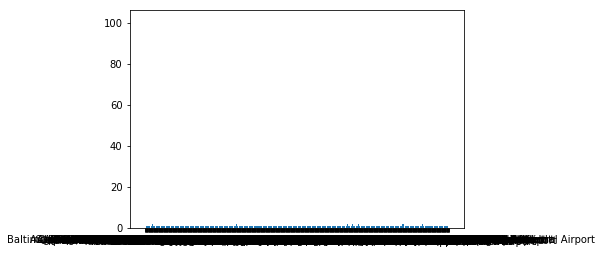

In [16]:
#is there anything we can learn about these data points?
import matplotlib.pyplot as plt
%matplotlib inline

names = pd.DataFrame(combo[['name']])
name_ct = names.groupby(['name'])['name'].count().reset_index(name="count")

y_name = np.arange(len(name_ct['name']))
y_count_nm = name_ct['count']

plt.bar(y_name, y_count_nm)
plt.xticks(y_name, name_ct['name'])
plt.show

                                             name  count
746                               Taitung Airport    101
213                            Düsseldorf Airport      2
438                             Learmonth Airport      2
256              Francisco de Sá Carneiro Airport      2
21   Alfonso Bonilla Aragon International Airport      2
755   Ted Stevens Anchorage International Airport      2
723                              Southend Airport      2
501               Melbourne International Airport      2
720                                 Sofia Airport      2
543                  Naples International Airport      2


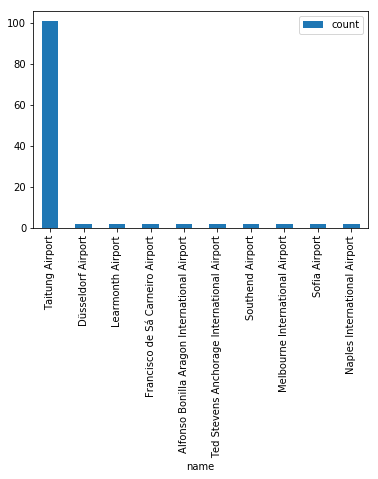

In [17]:
#Pretty crowded ... let's try limiting our population to the highest frequency and graphing with pandas

name_ct_10 = name_ct[['name','count']].sort_values(by='count', ascending = False)[:10]
print(name_ct_10)

name_ct_10.plot.bar(x = 'name', y = 'count', rot = 90)

#Rotating helps read the names on this one
#Aside from Taitung, doesn't look like any single airport is differentiated in traffic

    iso_country  count
148          US    348
144          TW    104
28           CA     36
107          MX     35
23           BR     23
34           CN     20
55           GB     17
72           IN     16
50           ES     16
76           IT     14


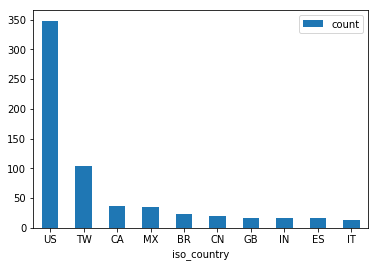

In [18]:
#what about countries?

countries = pd.DataFrame(combo[['iso_country']])
ctry_ct = countries.groupby(['iso_country'])['iso_country'].count().reset_index(name="count")

y_ctry = np.arange(len(ctry_ct['iso_country']))
y_count_ctry = ctry_ct['count']

ctry_ct_10 = ctry_ct[['iso_country','count']].sort_values(by='count', ascending = False)[:10]
print(ctry_ct_10)

ctry_ct_10.plot.bar(x = 'iso_country', y = 'count', rot = 0)

#there we go! Looks like a lot of data points for the US, followed by Taiwan (expected), and CA/MX

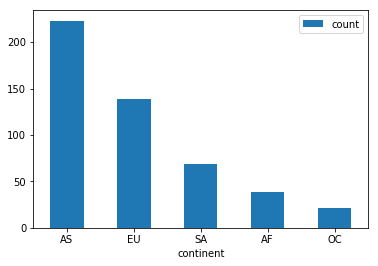

In [19]:
#Checking continents

continents = pd.DataFrame(combo[['continent']])

#Because the North American countries have continent code "NA", they uploaded as nulls
#need to replace these so they will appear in the following visualization
combo['continent'] = combo.continent.fillna('NA')

cont_ct = continents.groupby(['continent'])['continent'].count().reset_index(name="count")

y_cont = np.arange(len(cont_ct['continent']))
y_count_cont = cont_ct['count']

cont_ct_10 = cont_ct[['continent','count']].sort_values(by='count', ascending = False)[:10]
#print(ctry_ct_10)

#plt.bar(y_cont, y_count_cont)
#plt.xticks(y_cont, cont_ct['continent'])
#plt.show

cont_ct_10.plot.bar(x = 'continent', y = 'count', rot = 0)

#lots of flights out of North America and Asia, likely driven by the US and Taiwan

## Woo hoo!

### A few observations on the dataset:
    1. The data columns represent latitude and longtitude coordinates, shown in radians
    2. Each row represents an airport found around the world, some airports with numerous hits
    3. Taitung is represented far more than any other airport , at 101 entries (the second most frequent entry was 2)
    4. The US appears more than any other country (348 times), followed by Taiwan (104), Canada (36) and Mexico (35)
    5. The US and Asia dominate volume in this dataset
    6. Other than the min and max elevations, there was not much remarkable about the continuous variables summary stats
    
### If I had more time, I would:
    1. Dig into the datapoints that did not have a match with our airport database information. My hunch is that there were just 
    matching issues OR that they are airports that did not appear in the dataset that I downloaded. However, there may be 
    something interesting tucked in there
    2. Understand why most all of the airports appear once or twice. This could potentially be related to a 
    one-way/roundtrip dichotomy

### There are a few potential explanations of what's going on:
    1. The data represent flights -- either departures, arrivals or both! Each data point represents some action
    involving a location. I am curious about the frequency of Taitung. Are there a massiven number of users there? Is 
    Taiwan a particularly popular destination?
    2. The data represent flights of a particular airline, perhaps one based out of Taiwan
    3. The data represent some event or incident involved with an airport: delays, cancellations, issues? A Google News search of the airport shows that typhoons occassionally cancel 100+ flights at a time at Taitung
    4. These data represent a list of airports, where each should appear once. Taitung would be a data issue that would need cleaning, as well as all the airports that appear twice. I believe this is possible given the low frequency of each set of coordiantes. However, this feels like a stretch

#### Thanks for the challenge! This was a lot of fun.
#### Joe